# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [3]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
fraud.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [6]:
fraud['repeat_retailer'] = fraud['repeat_retailer'].astype(int)
fraud['used_chip'] = fraud['used_chip'].astype(int)
fraud['used_pin_number'] = fraud['used_pin_number'].astype(int)
fraud['online_order'] = fraud['online_order'].astype(int)
fraud['fraud'] = fraud['fraud'].astype(int)

In [7]:
fraud.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [8]:
fraud.shape

(1000000, 8)

In [9]:
# check for anomalies
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

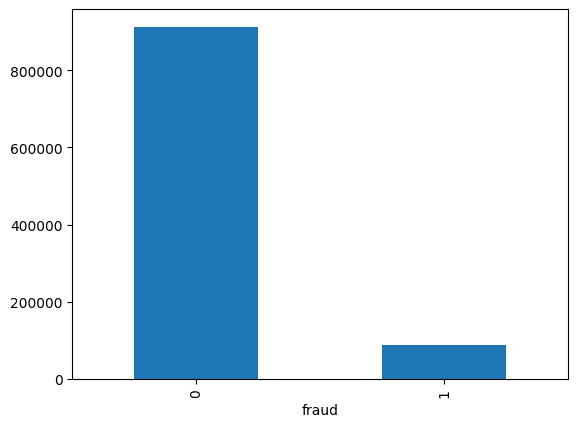

In [11]:
import matplotlib.pyplot as plt
target = fraud['fraud'].value_counts()
target.plot(kind="bar")
plt.show()

- **2.** Train a LogisticRegression.

In [12]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

from sklearn.utils import resample
log_reg = LogisticRegression()

In [17]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

 **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [18]:
log_reg.score(X_test_scaled, y_test)

0.958376

In [19]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    228075
           1       0.89      0.60      0.72     21925

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [20]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [21]:
train["fraud"] = y_train.values

**0=legit** -  **1=fraud**

In [27]:
fraud_1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud_1.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


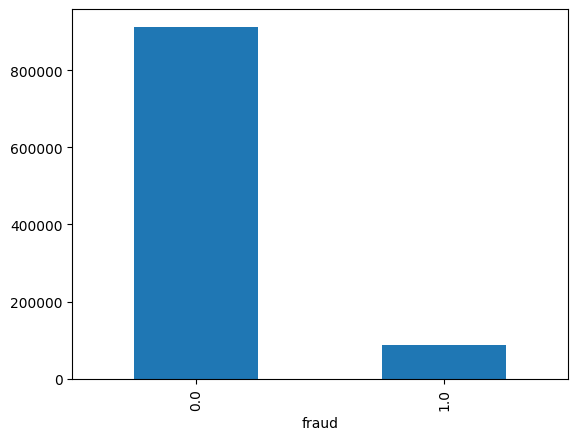

In [28]:
import matplotlib.pyplot as plt
target1 = fraud_1['fraud'].value_counts()
target1.plot(kind="bar")
plt.show()

In [41]:
fraud = train[train["fraud"] == 1]
legit = train[train["fraud"] == 0]

In [42]:
yes_frauded_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(legit),
                                    random_state=0)

In [43]:
train_over = pd.concat([yes_frauded_oversampled, legit])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30762,-0.330354,-0.205686,1.115246,0.366219,-0.734245,-0.334315,0.732845,1
499129,3.933313,-0.218896,-0.557638,0.366219,-0.734245,-0.334315,0.732845,1
488931,2.986351,-0.169808,-0.566406,0.366219,-0.734245,-0.334315,0.732845,1
600282,-0.232043,0.106137,1.047215,0.366219,-0.734245,-0.334315,0.732845,1
525180,-0.072987,-0.189774,2.038627,0.366219,1.361944,-0.334315,0.732845,1
...,...,...,...,...,...,...,...,...
749994,-0.139150,-0.192002,-0.471306,0.366219,1.361944,-0.334315,-1.364545,0
749995,-0.377239,-0.091928,-0.027008,0.366219,1.361944,-0.334315,0.732845,0
749996,-0.186632,-0.201914,-0.109003,0.366219,1.361944,-0.334315,-1.364545,0
749997,-0.251495,-0.202817,0.748356,0.366219,1.361944,-0.334315,0.732845,0


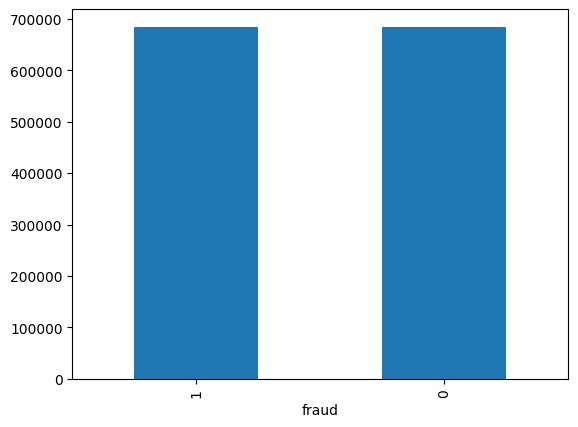

In [44]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [45]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [47]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228075
           1       0.58      0.95      0.72     21925

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [48]:
no_fraud_undersampled = resample(legit, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
103684,0.382865,-0.199147,-0.433259,0.366219,-0.734245,-0.334315,0.732845,0
35233,-0.371491,-0.207782,1.236655,0.366219,1.361944,-0.334315,-1.364545,0
501835,-0.397242,-0.216794,0.094599,-2.730610,1.361944,-0.334315,0.732845,0
669761,0.133967,0.324639,-0.456775,0.366219,1.361944,-0.334315,0.732845,0
318272,-0.302882,-0.214575,-0.589864,0.366219,-0.734245,-0.334315,0.732845,0
...,...,...,...,...,...,...,...,...
294354,-0.339668,-0.199075,-0.567362,0.366219,-0.734245,-0.334315,-1.364545,0
735031,-0.345562,-0.089499,-0.274114,0.366219,1.361944,2.991189,0.732845,0
737013,-0.059750,-0.208938,-0.606987,0.366219,-0.734245,-0.334315,0.732845,0
699735,0.181937,-0.139021,0.900553,0.366219,-0.734245,-0.334315,-1.364545,0


In [49]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
103684,0.382865,-0.199147,-0.433259,0.366219,-0.734245,-0.334315,0.732845,0
35233,-0.371491,-0.207782,1.236655,0.366219,1.361944,-0.334315,-1.364545,0
501835,-0.397242,-0.216794,0.094599,-2.730610,1.361944,-0.334315,0.732845,0
669761,0.133967,0.324639,-0.456775,0.366219,1.361944,-0.334315,0.732845,0
318272,-0.302882,-0.214575,-0.589864,0.366219,-0.734245,-0.334315,0.732845,0
...,...,...,...,...,...,...,...,...
749961,-0.385938,-0.042349,0.810353,-2.730610,-0.734245,-0.334315,0.732845,1
749971,2.724450,-0.215125,-0.380069,0.366219,-0.734245,-0.334315,0.732845,1
749980,0.293571,-0.173723,2.430568,0.366219,1.361944,-0.334315,0.732845,1
749983,-0.229223,-0.108120,1.824299,0.366219,1.361944,-0.334315,0.732845,1


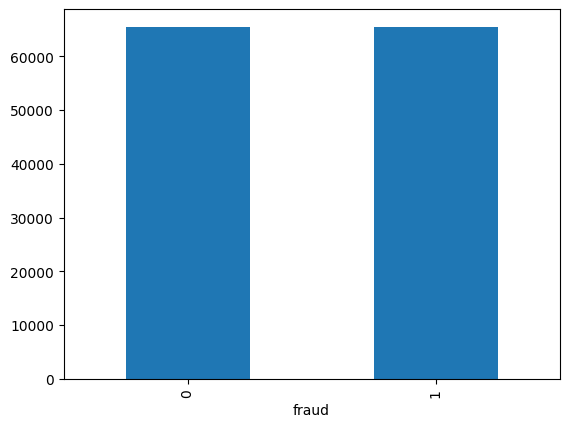

In [50]:
frauded_plt = train_under["fraud"].value_counts()
frauded_plt.plot(kind="bar")
plt.show()

In [52]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [54]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228075
           1       0.58      0.95      0.72     21925

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [57]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [58]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [59]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228075
           1       0.58      0.95      0.72     21925

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

